In [22]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [23]:
dataset = pd.read_csv('new_appdata10_1.csv')

In [24]:
response = dataset['enrolled']
dataset.drop('enrolled', axis=1, inplace=True)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size=0.2,
                                                    random_state=0)

In [26]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [27]:
train_identifier = X_train['user']
X_train.drop('user', axis=1, inplace=True)
test_identifier = X_test['user']
X_test.drop('user', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc_X = StandardScaler()

In [31]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

In [33]:
X_test2 = pd.DataFrame(sc_X.transform(X_test), columns=X_test.columns, index=X_test.index)

In [34]:
X_train =X_train2
X_test = X_test2

### Model Building

In [35]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [44]:
cm = confusion_matrix(y_test, y_pred)

In [45]:
accuracy_score(y_test, y_pred)

0.768

In [46]:
precision_score(y_test, y_pred)

0.7617422721798475

In [47]:
recall_score(y_test, y_pred)

0.7700892857142857

In [48]:
f1_score(y_test, y_pred)

0.7658930373360243

Test Data Accuracy: 0.7680


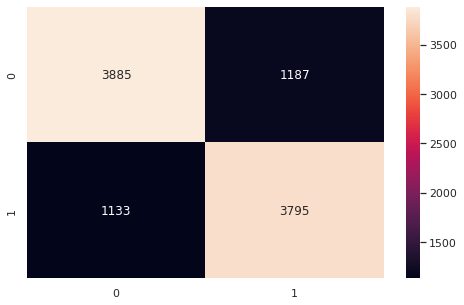

In [49]:
df_cm = pd.DataFrame(cm, index = (0,1), columns=(0,1))
plt.figure(figsize=(8,5))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, fmt='g')
print(f"Test Data Accuracy: {accuracy_score(y_test, y_pred):.4f}")

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10)

In [53]:
print(f"Logistic Accuracy: {accuracies.mean():.3f} (+/- {accuracies.std()*2:.3f})")

Logistic Accuracy: 0.767 (+/- 0.009)


### Formatting the Final results

In [54]:
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
